# Cryptocurrency Market Analysis
*Based off my stock market analysis of tech giants, located [here](https://github.com/melvfernandez/data_science_portfolio/blob/master/Stock%20Market%20Analysis%20for%20Tech%20Stocks.ipynb).*

***

In this project, we will analyze data from Yahoo Finance of three popular cryptocurrencies to date.

We will use Pandas to extract and analyze the information, visualize it, and analyze risks based on it's performance history.

Here are questions we will try to answer:
-  What was the change of price over time?
-  What was the daily return on average of a stock?
-  What was the moving average of various stock?
-  What is the correlation between daily returns of different stock?
-  How much value do we put at risk by investing in a stock?
-  How can we attempt to predict future stock behavior?

In [1]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

In [2]:
#We are going to analyze the top three tech giants.
cc_list = ['BTC-USD','ETH-USD','LTC-USD']

In [3]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [4]:
#using yahoo finance to grab crytocurrency data
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
LTC = pdr.DataReader('LTC-USD','yahoo',start,end)

In [5]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-13,810.109985,835.049988,771.000000,824.830017,824.830017,72555875
2017-01-14,824.830017,838.900024,808.270020,819.630005,819.630005,36594482
2017-01-15,819.630005,826.429993,808.630005,821.169983,821.169983,20004735
2017-01-16,821.169983,836.659973,817.700012,827.340027,827.340027,27592899
2017-01-17,827.340027,906.380005,825.039978,899.659973,899.659973,72272727


In [6]:
#STATISTICS FOR BTC'S STOCK
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,4434.581154,4632.686335,4225.330199,4471.436167,4471.436167,5.571000e+08
std,4408.374963,4644.183949,4108.074329,4434.241090,4434.241090,7.795554e+08
min,810.109985,826.429993,771.000000,819.630005,819.630005,1.021437e+07
25%,1238.864960,1256.954956,1212.914978,1241.452515,1241.452515,9.369637e+07
50%,2698.419922,2791.829956,2622.109986,2707.665039,2707.665039,2.761086e+08
75%,5492.965088,5703.382568,5310.447632,5560.142578,5560.142578,6.145818e+08
max,19346.599609,19870.619141,18750.910156,19345.490234,19345.490234,6.245732e+09


In [7]:
#INFORMATION ABOUT BTC DATAFRAME
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2017-01-13 to 2018-01-13
Data columns (total 6 columns):
Open         366 non-null float64
High         366 non-null float64
Low          366 non-null float64
Close        366 non-null float64
Adj Close    366 non-null float64
Volume       366 non-null int64
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


***

## What is the change in stock's price over time?

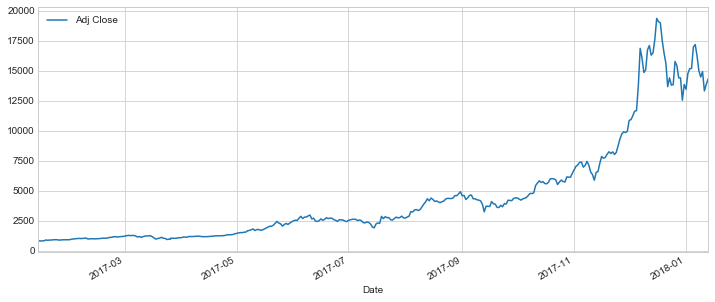

In [8]:
#Using pandas we canplot the stocks adjusted closing price
BTC['Adj Close'].plot(legend = True, figsize=(12,5))

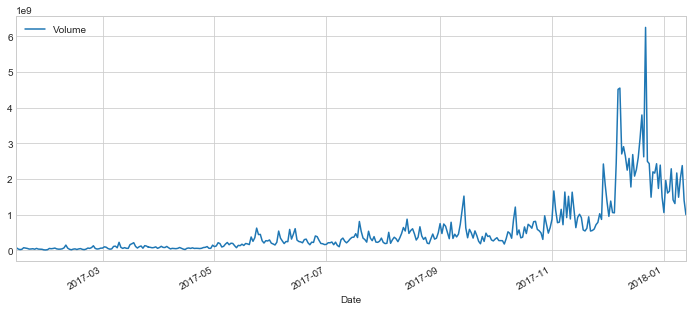

In [9]:
#Using pandas once more to plot the total volume being traded over time
BTC['Volume'].plot(legend=True,figsize=(12,5))

Within the year, we can see the value of BTC reach up to 20K.

***

## What was the moving average of the stocks?

In [10]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2018-01-09,14976.169922,15390.280273,14221.549805,14468.500000,14468.500000,1486802326,15218.602051,14799.950000,13889.036084
2018-01-10,14468.089844,14919.490234,13450.540039,14919.490234,14919.490234,2025083791,15325.511035,14764.318506,14025.426484
2018-01-11,14920.360352,14979.959961,12825.950195,13308.059570,13308.059570,2373494121,15311.829004,14746.472998,14126.896680
2018-01-12,13308.059570,14129.080078,12851.910156,13841.190430,13841.190430,1402292716,15220.535059,14718.709521,14243.452285
2018-01-13,13841.190430,14595.040039,13830.280273,14296.299805,14296.299805,997834880,15134.503027,14744.027002,14365.362285


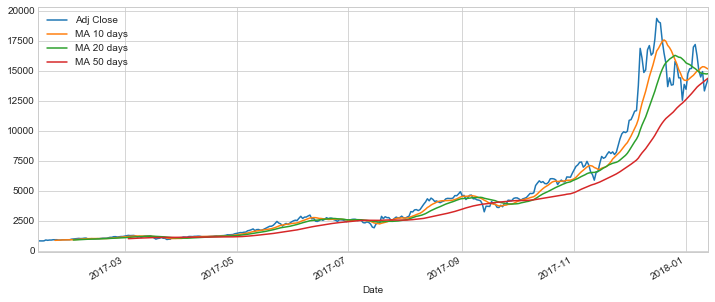

In [12]:
BTC[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True,figsize=(12,5))

Genereally some casual dips in the past month but overall an upward trend.

***

## What was the daily return average of a stock?

In [13]:
#In order calculate daily return we can use the percentage change of the adjusted closing price

BTC['Daily Return'] = BTC['Adj Close'].pct_change()

BTC['Daily Return'].tail()

Date
2018-01-09   -0.033899
2018-01-10    0.031170
2018-01-11   -0.108008
2018-01-12    0.040061
2018-01-13    0.032881
Name: Daily Return, dtype: float64

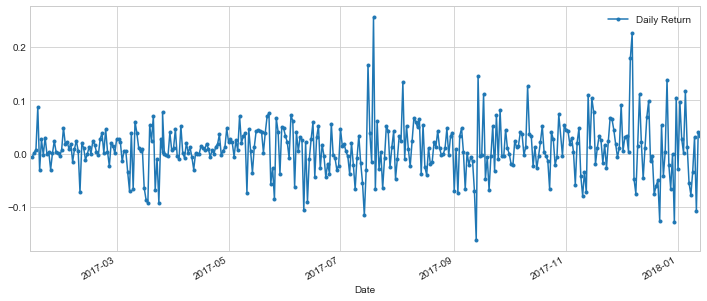

In [14]:
#Let us now plot the daily return
BTC['Daily Return'].plot(marker='.',legend=True,figsize=(12,5))

Positive daily returns seem to be more frequent than negative returns.

## What was the correlation between daily returns of different stocks?

In [15]:
#Let's read the 'Adj Close' column from all the tech giants

close_df = pdr.DataReader(cc_list,'yahoo',start,end)['Adj Close']

In [16]:
close_df.tail()

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2017-01-17,899.659973,10.14,3.89
2017-01-16,827.340027,9.59,3.82
2017-01-15,821.169983,9.88,3.85
2017-01-14,819.630005,9.78,3.89
2017-01-13,824.830017,9.78,3.86


In [17]:
#Let's explore the returns again using the percentage change from the adj close.
returns_df = close_df.pct_change()

In [18]:
returns_df.tail()

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2017-01-17,0.031685,-0.004907,0.023684
2017-01-16,-0.080386,-0.054241,-0.017995
2017-01-15,-0.007458,0.030240,0.007853
2017-01-14,-0.001875,-0.010121,0.010390
2017-01-13,0.006344,0.000000,-0.007712


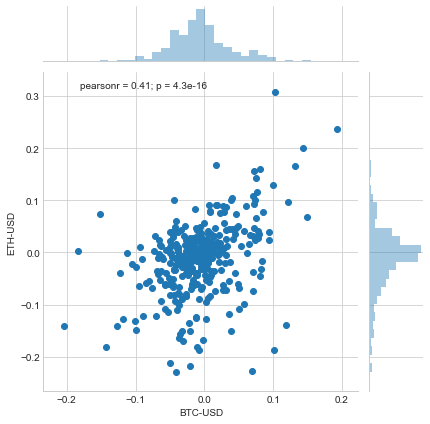

In [19]:
#We can now try to find the correlation between Bitcoin and Ethreum
sns.jointplot('BTC-USD','ETH-USD',returns_df,kind='scatter')

There seems to be a minor positive correlation between the two, the pearsonr correlation coefficient value of 0.4 agrees with that statement.

Let's use a pairplot to visualize all the tech giants in one view.

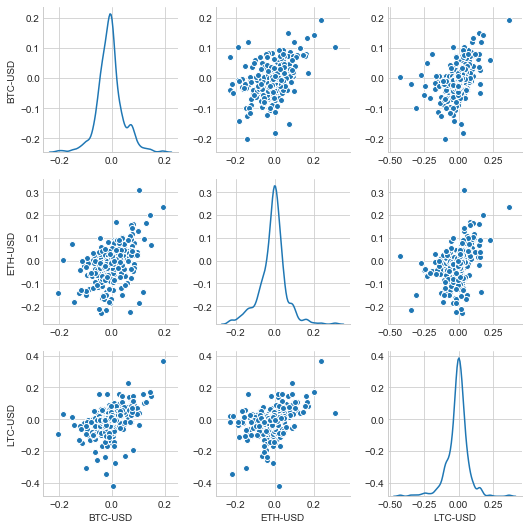

In [20]:
sns.pairplot(returns_df.dropna(),diag_kind='kde')

Quick and easy way to view correlations but let's use a correlation plot to see the actual numbers.

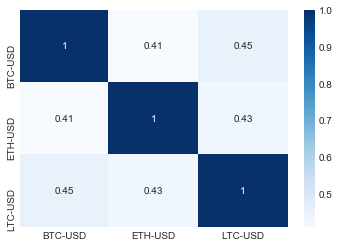

In [21]:
corr = returns_df.dropna().corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='Blues')

In [22]:
rets = returns_df.dropna()

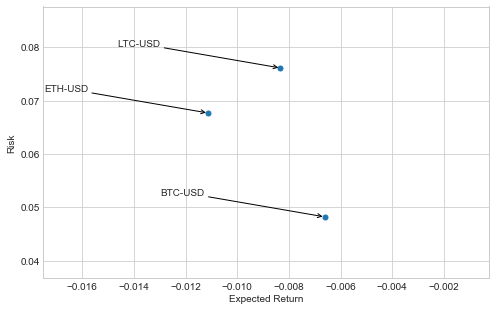

In [23]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(-120,20),
        textcoords = 'offset points', 
        ha = 'right', 
        va = 'bottom',
        arrowprops = dict(arrowstyle='->'))

As of January 12, the current trend for cryptocurrencies seem to output a negative return. We want a crypto with high return and low risk.

In [24]:
rets.head()

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2018-01-12,-0.031834,-0.088568,-0.089168
2018-01-11,-0.038518,-0.096516,-0.037476
2018-01-10,0.121087,0.096259,0.099634
2018-01-09,-0.030228,0.032226,-0.012284
2018-01-08,0.035088,-0.118775,0.033369


In [36]:
qt = rets['BTC-USD'].quantile(0.05)

In [37]:
qt_pct = abs(rets['BTC-USD'].quantile(0.05))*100
print(qt_pct)

7.520812409850451


In [43]:
print("The 0.05 empirical quantile of daily returns is at {0:.2f}. This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment).".format(qt,qt_pct))

The 0.05 empirical quantile of daily returns is at -0.08. This means that with 95% confidence, the worst daily loss will not exceed -0.08% (of the investment).
